In [14]:
#import shutil
#shutil.rmtree('/Users/Sabrina Nourin/AppData/Local/Programs/Python/Python38/FIRE-SMOKE-DATASET/Train/Smoke')
#shutil.rmtree('/Users/Sabrina Nourin/AppData/Local/Programs/Python/Python38/FIRE-SMOKE-DATASET/Test/Smoke')

In [1]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil

In [2]:
TRAINING_DIR = "/poralekha/python/fire_dataset/FIRE-SMOKE-DATASET/Train"

training_datagen = ImageDataGenerator(rescale=1./255,
zoom_range=0.15,
horizontal_flip=True,
fill_mode='nearest')

VALIDATION_DIR = "/poralekha/python/fire_dataset/FIRE-SMOKE-DATASET/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(224,224),
shuffle = True,
class_mode='categorical',
  batch_size = 128
)

validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(224,224),
class_mode='categorical',
shuffle = True,
  batch_size= 14
)

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout

In [4]:
input_tensor = Input(shape=(224, 224, 3))

base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [5]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)

Epoch 1/20
14/14 [==============================] - 96s 7s/step - loss: 8.0051 - acc: 0.7796 - val_loss: 0.1108 - val_acc: 0.9592
Epoch 2/20
14/14 [==============================] - 95s 7s/step - loss: 0.1827 - acc: 0.9288 - val_loss: 0.1102 - val_acc: 0.9592
Epoch 3/20
14/14 [==============================] - 104s 7s/step - loss: 0.1965 - acc: 0.9222 - val_loss: 0.0944 - val_acc: 0.9643
Epoch 4/20
14/14 [==============================] - 100s 7s/step - loss: 0.1491 - acc: 0.9306 - val_loss: 0.1223 - val_acc: 0.9592
Epoch 5/20
14/14 [==============================] - 102s 7s/step - loss: 0.2376 - acc: 0.9294 - val_loss: 0.1259 - val_acc: 0.9694
Epoch 6/20
14/14 [==============================] - 109s 8s/step - loss: 0.1978 - acc: 0.9504 - val_loss: 0.1616 - val_acc: 0.9541
Epoch 7/20
14/14 [==============================] - 107s 8s/step - loss: 0.0998 - acc: 0.9593 - val_loss: 0.2147 - val_acc: 0.9337
Epoch 8/20
14/14 [==============================] - 101s 7s/step - loss: 0.3950 - acc

In [6]:
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
        print('\n\n Reached The Destination!')
        self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)
print(len(base_model.layers))

Epoch 1/10
14/14 [==============================] - 151s 11s/step - loss: 0.4971 - acc: 0.7344 - val_loss: 0.0843 - val_acc: 0.9694
Epoch 2/10
14/14 [==============================] - 149s 11s/step - loss: 0.3216 - acc: 0.8146 - val_loss: 0.0916 - val_acc: 0.9694
Epoch 3/10
14/14 [==============================] - 156s 11s/step - loss: 0.2916 - acc: 0.8565 - val_loss: 0.1028 - val_acc: 0.9592
Epoch 4/10
14/14 [==============================] - 144s 10s/step - loss: 0.2453 - acc: 0.8834 - val_loss: 0.1065 - val_acc: 0.9592
Epoch 5/10
14/14 [==============================] - 121s 9s/step - loss: 0.1948 - acc: 0.9073 - val_loss: 0.1110 - val_acc: 0.9592
Epoch 6/10
14/14 [==============================] - 120s 9s/step - loss: 0.1678 - acc: 0.9222 - val_loss: 0.1163 - val_acc: 0.9541
Epoch 7/10
14/14 [==============================] - 118s 8s/step - loss: 0.1620 - acc: 0.9456 - val_loss: 0.1068 - val_acc: 0.9643
Epoch 8/10
14/14 [==============================] - 125s 9s/step - loss: 0.1439

In [7]:
import numpy as np
#from google.colab import files
from keras.preprocessing import image

Using TensorFlow backend.


In [24]:
keys = ['fire.jpg','non_fire_1.jpg','non_fire_2.jpg']
for key in keys:
    path = '/poralekha/python/fire_dataset/test_image/'+key
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) /255
    classes = model.predict(x)
    print(key,' ',np.argmax(classes[0])==0, max(classes[0]))

fire.jpg   True 0.9950334
non_fire_1.jpg   False 0.7909601
non_fire_2.jpg   False 0.70530057


In [23]:
import matplotlib.pyplot as plt

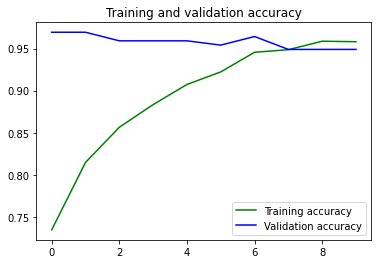

<Figure size 432x288 with 0 Axes>

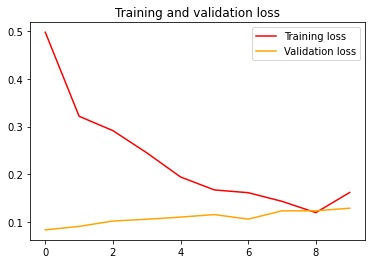

<Figure size 432x288 with 0 Axes>

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()